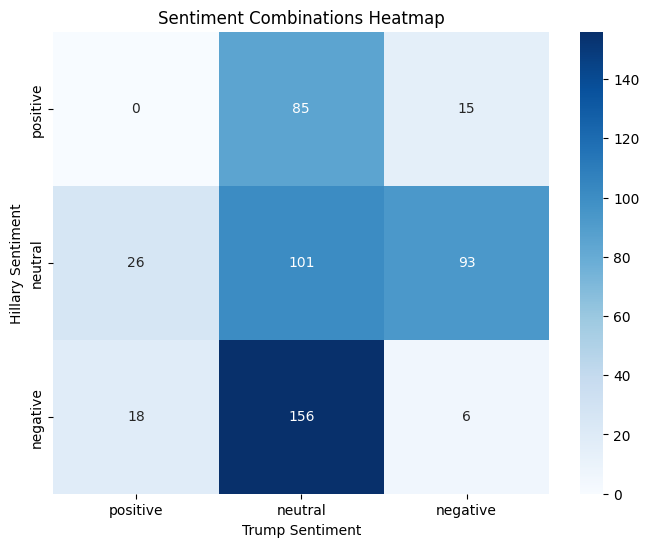

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your counts dictionary
counts = {
    ('positive', 'positive'): 0,
    ('positive', 'neutral'): 85,
    ('positive', 'negative'): 15,
    ('neutral', 'positive'): 26,
    ('neutral', 'neutral'): 101,
    ('neutral', 'negative'): 93,
    ('negative', 'positive'): 18,
    ('negative', 'neutral'): 156,
    ('negative', 'negative'): 6
}

# Create a matrix for the heatmap: Rows are Hillary's sentiment, Columns are Trump's sentiment
hillary_labels = ['positive', 'neutral', 'negative']
trump_labels = ['positive', 'neutral', 'negative']

# Initialize an empty 3x3 matrix to store the counts
matrix = np.zeros((3, 3))

# Fill the matrix with counts from the dictionary
for (hillary_sentiment, trump_sentiment), count in counts.items():
    row = hillary_labels.index(hillary_sentiment)
    col = trump_labels.index(trump_sentiment)
    matrix[row, col] = count

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=trump_labels, yticklabels=hillary_labels, fmt='g')

# Add labels and title
plt.title("Sentiment Combinations Heatmap")
plt.xlabel("Trump Sentiment")
plt.ylabel("Hillary Sentiment")
plt.show()


In [14]:
import csv

# Path to the CSV file
file_path = "./truth_labels.csv"  # Make sure this is the correct path

# Initialize a dictionary to count combinations of sentiments
counts = {
    ('positive', 'positive'): 0,
    ('positive', 'neutral'): 0,
    ('positive', 'negative'): 0,
    ('neutral', 'positive'): 0,
    ('neutral', 'neutral'): 0,
    ('neutral', 'negative'): 0,
    ('negative', 'positive'): 0,
    ('negative', 'neutral'): 0,
    ('negative', 'negative'): 0
}

# Open and read the CSV file using the csv module
try:
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        # Use ';' as the delimiter
        csvreader = csv.reader(csvfile, delimiter=';')
        
        # Skip the header if it exists
        header = next(csvreader, None)
        
        # Print the header to confirm
        print(f"Header: {header}")
        
        # Counter to track how many rows we've processed
        row_count = 0
        
        # Loop through each row and check the sentiments, but only process the first 500 rows
        for row in csvreader:
            if row_count >= 500:
                break  # Stop after processing 500 rows
            
            # Check if the row has at least 3 columns
            if len(row) < 3:
                continue  # Skip this row if it's missing necessary columns
                
            hilary_sentiment = row[1]  # Column B: Hillary sentiment
            trump_sentiment = row[2]  # Column C: Trump sentiment
            
            # If the combination exists in our counts dictionary, increment it
            if (hilary_sentiment, trump_sentiment) in counts:
                counts[(hilary_sentiment, trump_sentiment)] += 1
            
            row_count += 1

    # Print the final counts of each combination
    print("\nSentiment combinations count (first 500 rows):")
    for combination, count in counts.items():
        print(f"Hillary: {combination[0]}, Trump: {combination[1]} -> {count}")
        
except Exception as e:
    print(f"Error loading the CSV file: {e}")


Header: ['cleaned_text', 'hillary sentiment', 'trump sentiment']

Sentiment combinations count (first 500 rows):
Hillary: positive, Trump: positive -> 0
Hillary: positive, Trump: neutral -> 85
Hillary: positive, Trump: negative -> 15
Hillary: neutral, Trump: positive -> 26
Hillary: neutral, Trump: neutral -> 101
Hillary: neutral, Trump: negative -> 93
Hillary: negative, Trump: positive -> 18
Hillary: negative, Trump: neutral -> 156
Hillary: negative, Trump: negative -> 6
